In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [2]:
data = pd.read_csv('/content/Latest_1200.csv', encoding='unicode_escape')

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vocabVector = CountVectorizer(analyzer='word', binary=True, lowercase=True, stop_words='english', vocabulary=None)

In [4]:
data.replace({"Label": {'No':0, 'Yes':1}}, inplace= True)

In [5]:
X= data.iloc[:,0:1].values
Y= data.iloc[:,1:2].values

In [6]:
X_flat = list(np.concatenate(X). flat)
Y_flat = list(np.concatenate(Y). flat)

X_reshape= np.reshape(X_flat, (-1, 1))
Y_reshape= np.reshape(Y_flat, (-1, 1))

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X_reshape,Y_reshape,test_size=.2,random_state=20)

Xtr= np.char.lower(x_train)
Xts= np.char.lower(x_test)

trainFeatureData_X = vocabVector.fit_transform([Xtr[0] for Xtr in Xtr])
testFeatureData_X = vocabVector.transform([Xts[0] for Xts in Xts])

X_train= trainFeatureData_X.toarray()
X_test= testFeatureData_X.toarray()

In [7]:
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)

decision_class= DecisionTreeClassifier()
decision_class.fit(X_train,Y_train)

support_vec= SVC(gamma='auto', probability=True)
support_vec.fit(X_train,Y_train)

naive_class= GaussianNB()
naive_class.fit(X_train,Y_train)

random_class= RandomForestClassifier()
random_class.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(

RandomForestClassifier()

In [8]:
y_pred_lr = log_regression.predict(X_test)

y_pred_dtc= decision_class.predict(X_test)

y_pred_svc= support_vec.predict(X_test)

y_pred_nb= naive_class.predict(X_test)

y_pred_rfc= random_class.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, y_pred_lr)
print("\nAccuracy Of LR: ")
print(acc)


acc_dtc= accuracy_score(Y_test, y_pred_dtc)
print("\nAccuracy Of Decision Tree: ")
print(acc_dtc)


acc_svc = accuracy_score(Y_test, y_pred_svc)
print("\nAccuracy Of Support Vector: ")
print(acc_svc)


acc_nb = accuracy_score(Y_test, y_pred_nb)
print("\nAccuracy Of Naive bayes: ")
print(acc_nb)


acc_rfc = accuracy_score(Y_test, y_pred_rfc)
print("\nAccuracy Of Random Forest: ")
print(acc_rfc)


Accuracy Of LR: 
0.9105691056910569

Accuracy Of Decision Tree: 
0.8780487804878049

Accuracy Of Support Vector: 
0.8861788617886179

Accuracy Of Naive bayes: 
0.8943089430894309

Accuracy Of Random Forest: 
0.926829268292683



Logistic



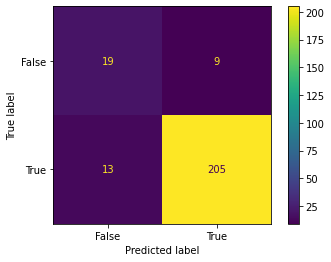

{'Precision': 0.9579439252336449, 'Sensitivity_recall': 0.9403669724770642, 'F1_score': 0.9490740740740741}

Decision Tree



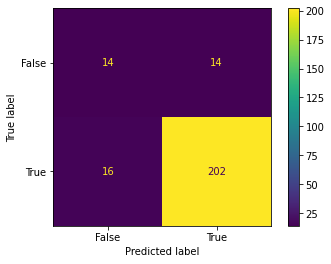

{'Precision': 0.9351851851851852, 'Sensitivity_recall': 0.926605504587156, 'F1_score': 0.9308755760368663}

Support Vector Classifierc



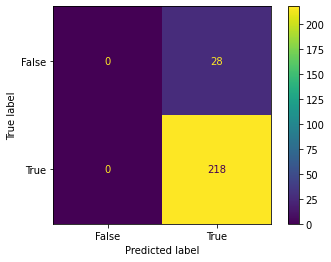

{'Precision': 0.8861788617886179, 'Sensitivity_recall': 1.0, 'F1_score': 0.9396551724137931}

Naive Bayes



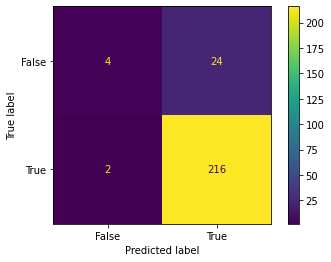

{'Precision': 0.9, 'Sensitivity_recall': 0.9908256880733946, 'F1_score': 0.9432314410480349}

Random Forest



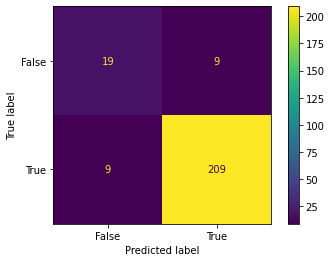

{'Precision': 0.9587155963302753, 'Sensitivity_recall': 0.9587155963302753, 'F1_score': 0.9587155963302753}


In [10]:
confusion_matrix_lr = metrics.confusion_matrix(Y_test, y_pred_lr)
cm_display_lr = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lr, display_labels = [False, True])
print("\nLogistic\n")
cm_display_lr.plot()
plt.show()
Precision_lr = metrics.precision_score(Y_test, y_pred_lr)
Sensitivity_recall_lr = metrics.recall_score(Y_test, y_pred_lr)
F1_score_lr = metrics.f1_score(Y_test, y_pred_lr)
print({"Precision":Precision_lr,"Sensitivity_recall":Sensitivity_recall_lr,
       "F1_score":F1_score_lr})



confusion_matrix_dtc = metrics.confusion_matrix(Y_test, y_pred_dtc)
cm_display_dtc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dtc, display_labels = [False, True])
print("\nDecision Tree\n")
cm_display_dtc.plot()
plt.show()
Precision_dtc = metrics.precision_score(Y_test, y_pred_dtc)
Sensitivity_recall_dtc = metrics.recall_score(Y_test, y_pred_dtc)
F1_score_dtc = metrics.f1_score(Y_test, y_pred_dtc)
print({"Precision":Precision_dtc,"Sensitivity_recall":Sensitivity_recall_dtc,
       "F1_score":F1_score_dtc})



confusion_matrix_svc = metrics.confusion_matrix(Y_test, y_pred_svc)
cm_display_svc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svc, display_labels = [False, True])
print("\nSupport Vector Classifierc\n")
cm_display_svc.plot()
plt.show()
Precision_svc = metrics.precision_score(Y_test, y_pred_svc)
Sensitivity_recall_svc = metrics.recall_score(Y_test, y_pred_svc)
F1_score_svc = metrics.f1_score(Y_test, y_pred_svc)
print({"Precision":Precision_svc,"Sensitivity_recall":Sensitivity_recall_svc,
       "F1_score":F1_score_svc})



confusion_matrix_nb = metrics.confusion_matrix(Y_test, y_pred_nb)
cm_display_nb = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_nb, display_labels = [False, True])
print("\nNaive Bayes\n")
cm_display_nb.plot()
plt.show()
Precision_nb = metrics.precision_score(Y_test, y_pred_nb)
Sensitivity_recall_nb = metrics.recall_score(Y_test, y_pred_nb)
F1_score_nb = metrics.f1_score(Y_test, y_pred_nb)
print({"Precision":Precision_nb,"Sensitivity_recall":Sensitivity_recall_nb,
       "F1_score":F1_score_nb})



confusion_matrix_rfc = metrics.confusion_matrix(Y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc, display_labels = [False, True])
print("\nRandom Forest\n")
cm_display_rfc.plot()
plt.show()
Precision_rfc = metrics.precision_score(Y_test, y_pred_rfc)
Sensitivity_recall_rfc = metrics.recall_score(Y_test, y_pred_rfc)
F1_score_rfc = metrics.f1_score(Y_test, y_pred_rfc)
print({"Precision":Precision_rfc,"Sensitivity_recall":Sensitivity_recall_rfc,
       "F1_score":F1_score_rfc})


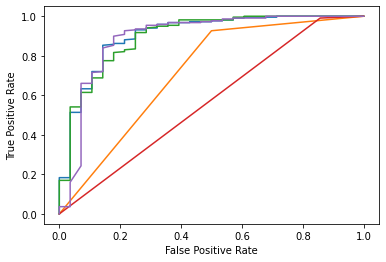

In [11]:
#define metrics
y_pre_lr = log_regression.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(Y_test,  y_pre_lr)

y_pre_dtc = decision_class.predict_proba(X_test)[::,1]
fpr_dtc, tpr_dtc, _ = metrics.roc_curve(Y_test,  y_pre_dtc)

y_pre_sv = support_vec.predict_proba(X_test)[::,1]
fpr_sv, tpr_sv, _ = metrics.roc_curve(Y_test,  y_pre_sv)

y_pre_nb = naive_class.predict_proba(X_test)[::,1]
fpr_nb, tpr_nb, _ = metrics.roc_curve(Y_test,  y_pre_nb)

y_pre_rtc = random_class.predict_proba(X_test)[::,1]
fpr_rtc, tpr_rtc, _ = metrics.roc_curve(Y_test,  y_pre_rtc)

#create ROC curve
plt.plot(fpr_lr,tpr_lr)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_sv, tpr_sv)
plt.plot(fpr_nb, tpr_nb)
plt.plot(fpr_rtc, tpr_rtc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

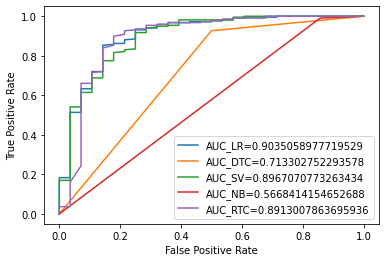

In [12]:
#define metrics

auc_lr = metrics.roc_auc_score(Y_test, y_pre_lr)
auc_dtc = metrics.roc_auc_score(Y_test, y_pre_dtc)
auc_sv = metrics.roc_auc_score(Y_test, y_pre_sv)
auc_nb = metrics.roc_auc_score(Y_test, y_pre_nb)
auc_rtc = metrics.roc_auc_score(Y_test, y_pre_rtc)



#create ROC curve
plt.plot(fpr_lr,tpr_lr,label="AUC_LR="+str(auc_lr))
plt.plot(fpr_dtc, tpr_dtc,label="AUC_DTC="+str(auc_dtc))
plt.plot(fpr_sv, tpr_sv,label="AUC_SV="+str(auc_sv))
plt.plot(fpr_nb, tpr_nb,label="AUC_NB="+str(auc_nb))
plt.plot(fpr_rtc, tpr_rtc,label="AUC_RTC="+str(auc_rtc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

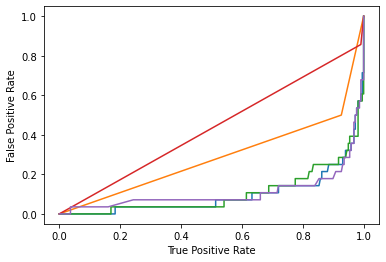

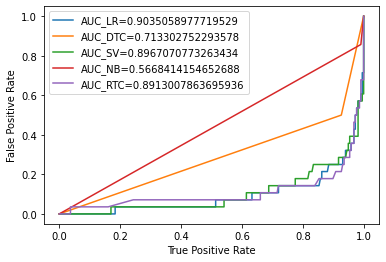

In [14]:
#create ROC curve
plt.plot(tpr_lr, fpr_lr)
plt.plot(tpr_dtc, fpr_dtc )
plt.plot(tpr_sv, fpr_sv)
plt.plot( tpr_nb, fpr_nb)
plt.plot(tpr_rtc, fpr_rtc)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()


#define metrics

auc_lr = metrics.roc_auc_score(Y_test, y_pre_lr)
auc_dtc = metrics.roc_auc_score(Y_test, y_pre_dtc)
auc_sv = metrics.roc_auc_score(Y_test, y_pre_sv)
auc_nb = metrics.roc_auc_score(Y_test, y_pre_nb)
auc_rtc = metrics.roc_auc_score(Y_test, y_pre_rtc)



#create ROC curve
plt.plot(tpr_lr, fpr_lr,label="AUC_LR="+str(auc_lr))
plt.plot(tpr_dtc, fpr_dtc,label="AUC_DTC="+str(auc_dtc))
plt.plot(tpr_sv, fpr_sv,label="AUC_SV="+str(auc_sv))
plt.plot(tpr_nb, fpr_nb,label="AUC_NB="+str(auc_nb))
plt.plot(tpr_rtc, fpr_rtc,label="AUC_RTC="+str(auc_rtc))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend(loc=2)
plt.show()